In [3]:
#importing necessary libraries
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder, LabelEncoder, PowerTransformer
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.feature_selection import SelectPercentile, chi2
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score,roc_curve, roc_auc_score, plot_roc_curve
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor,RandomForestClassifier, BaggingClassifier
from sklearn.metrics import confusion_matrix, classification_report
from scipy.stats import norm, stats
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
import statistics as st
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import time


#import plotty
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv")
df.head() #read the csv file

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Documentation:
1. Dataset contains 13 columns
2. Out of which 8 columns are in object form
3. There is high skewness in 'CoapplicantIncome' column
4. 'Loan_Amount_Term', 'Credit_History','Dependents','Credit_History' etc has some missing values
5. There are some null values in many columns
6. There is no duplicate rows in this dataset
7. Almost, every columns are inter related to each other

In [5]:
df.shape #check the shape of the dataset

(614, 13)

In [6]:
df.columns #check the number of columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [7]:
df.describe() #check the parameters

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
df.info() #check the null values and Dtype of the columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [9]:
df.duplicated().sum() #check the duplicate values in our column

0

In [10]:
df.isnull().sum() #check the null values 

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

# Column1: Loan_ID

In [11]:
df['Loan_ID'].unique() #check the unique values

array(['LP001002', 'LP001003', 'LP001005', 'LP001006', 'LP001008',
       'LP001011', 'LP001013', 'LP001014', 'LP001018', 'LP001020',
       'LP001024', 'LP001027', 'LP001028', 'LP001029', 'LP001030',
       'LP001032', 'LP001034', 'LP001036', 'LP001038', 'LP001041',
       'LP001043', 'LP001046', 'LP001047', 'LP001050', 'LP001052',
       'LP001066', 'LP001068', 'LP001073', 'LP001086', 'LP001087',
       'LP001091', 'LP001095', 'LP001097', 'LP001098', 'LP001100',
       'LP001106', 'LP001109', 'LP001112', 'LP001114', 'LP001116',
       'LP001119', 'LP001120', 'LP001123', 'LP001131', 'LP001136',
       'LP001137', 'LP001138', 'LP001144', 'LP001146', 'LP001151',
       'LP001155', 'LP001157', 'LP001164', 'LP001179', 'LP001186',
       'LP001194', 'LP001195', 'LP001197', 'LP001198', 'LP001199',
       'LP001205', 'LP001206', 'LP001207', 'LP001213', 'LP001222',
       'LP001225', 'LP001228', 'LP001233', 'LP001238', 'LP001241',
       'LP001243', 'LP001245', 'LP001248', 'LP001250', 'LP0012

In [12]:
df['Loan_ID'].value_counts()#check the counts of unique values

LP002446    1
LP001266    1
LP001734    1
LP001032    1
LP002178    1
           ..
LP001945    1
LP002342    1
LP001713    1
LP002933    1
LP002225    1
Name: Loan_ID, Length: 614, dtype: int64

In [13]:
df['Loan_ID'].duplicated().sum()#check the duplicate values in our column

0

In [14]:
df['Loan_ID'].isnull().sum()#check the null values 

0

In [15]:
lab_enc = LabelEncoder() #using Label Encoder to transform our column data
df['Loan_ID'] = pd.Series(lab_enc.fit_transform(df['Loan_ID']))

In [16]:
df['Loan_ID'].unique() #check the unique values now

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [17]:
#check the updated shape of our dataset
print('Actual shape of our Dataset now :-------->', df.shape)

Actual shape of our Dataset now :--------> (614, 13)


# Column2: Gender

In [18]:
df['Gender'].unique()#check the unique values

array(['Male', 'Female', nan], dtype=object)

In [19]:
df['Gender'].value_counts()#check the counts of unique values

Male      489
Female    112
Name: Gender, dtype: int64

In [20]:
df['Gender'].isnull().sum()#check the null values 

13

In [21]:
df.dropna(subset=["Gender"], inplace=True) #drop the null values

In [22]:
df['Gender'].isnull().sum()#check the null values 

0

In [23]:
df['Gender'].value_counts()#check the counts of unique values

Male      489
Female    112
Name: Gender, dtype: int64

In [24]:
gender = ['Male', 'Female']
values= [489,112] #making dataframes

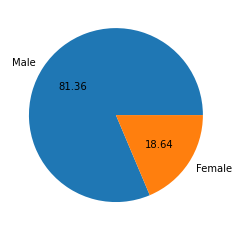

In [25]:
plt.pie(values, labels = gender, autopct = '%.2f')
plt.show() #visualize by pieplot

In [26]:
df.groupby('Gender')['Loan_Status'].value_counts(normalize = True)
#Checking the relationship between gender and loan_Status

Gender  Loan_Status
Female  Y              0.669643
        N              0.330357
Male    Y              0.693252
        N              0.306748
Name: Loan_Status, dtype: float64

In [27]:
df.groupby('Gender')['Married'].value_counts(normalize = True)
#Checking the relationship between gender and Married

Gender  Married
Female  No         0.720721
        Yes        0.279279
Male    Yes        0.733060
        No         0.266940
Name: Married, dtype: float64

In [28]:
df.groupby('Gender')['Education'].value_counts(normalize = True)
#Checking the relationship between gender and Education

Gender  Education   
Female  Graduate        0.821429
        Not Graduate    0.178571
Male    Graduate        0.768916
        Not Graduate    0.231084
Name: Education, dtype: float64

In [29]:
df.groupby('Gender')['Self_Employed'].value_counts(normalize = True)
#Checking the relationship between gender and Self_Employed

Gender  Self_Employed
Female  No               0.855769
        Yes              0.144231
Male    No               0.864516
        Yes              0.135484
Name: Self_Employed, dtype: float64

In [30]:
df.groupby('Gender')['Property_Area'].value_counts(normalize = True)
#Checking the relationship between gender and Property_Area

Gender  Property_Area
Female  Semiurban        0.491071
        Urban            0.294643
        Rural            0.214286
Male    Semiurban        0.351738
        Urban            0.339468
        Rural            0.308793
Name: Property_Area, dtype: float64

Observation:
1. Null values are found and treated
2. No zero values are found
3. Approx 81% are Males and 18% are females
4. Approx 66% Females Loan status is Yes and 69% for Males
5. More numbers of Females are not Married and Maximum males are married:- Females: 72.07, males: 73.3
6. More numbers of Males and Females are Graduated:- Females: 82.1, Males: 76.89
7. More numbers of Males and Females are not Self_Employed:- Females: 85.5, Males: 86.45 
8. More numbers of peoples are from Semiurban:- Females: 49%, Males: 35%

In [31]:
#check the updated shape of our dataset
print('Actual shape of our Dataset now :-------->', df.shape)

Actual shape of our Dataset now :--------> (601, 13)


# Column3: Married

In [32]:
df['Married'].unique()#check the unique values

array(['No', 'Yes', nan], dtype=object)

In [33]:
df['Married'].value_counts()#check the counts of unique values

Yes    388
No     210
Name: Married, dtype: int64

In [34]:
df['Married'].isnull().sum()#check the null values 

3

In [35]:
df.dropna(subset=["Married"], inplace=True) #drop the null values

In [36]:
df['Married'].isnull().sum()#check the null values 

0

In [37]:
df['Married'].unique()#check the unique values

array(['No', 'Yes'], dtype=object)

In [38]:
marry = ['Yes', 'No']
values= [388,210] #making dataframes

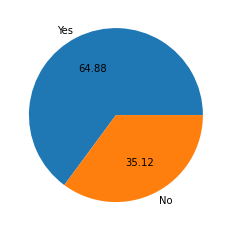

In [39]:
plt.pie(values, labels = marry, autopct = '%.2f')
plt.show() #visualize by pieplot

In [40]:
df.groupby('Married')['Loan_Status'].value_counts(normalize = True)
#Checking the relationship between Married and loan_Status

Married  Loan_Status
No       Y              0.628571
         N              0.371429
Yes      Y              0.719072
         N              0.280928
Name: Loan_Status, dtype: float64

In [41]:
df.groupby('Married')['Education'].value_counts(normalize = True)
#Checking the relationship between Married and Education

Married  Education   
No       Graduate        0.785714
         Not Graduate    0.214286
Yes      Graduate        0.773196
         Not Graduate    0.226804
Name: Education, dtype: float64

In [42]:
df.groupby('Married')['Self_Employed'].value_counts(normalize = True)
#Checking the relationship between Married and Self_Employed

Married  Self_Employed
No       No               0.862245
         Yes              0.137755
Yes      No               0.862162
         Yes              0.137838
Name: Self_Employed, dtype: float64

In [43]:
df.groupby('Married')['Property_Area'].value_counts(normalize = True)
#Checking the relationship between Married and Property_Area

Married  Property_Area
No       Semiurban        0.371429
         Urban            0.328571
         Rural            0.300000
Yes      Semiurban        0.378866
         Urban            0.332474
         Rural            0.288660
Name: Property_Area, dtype: float64

Observation:
1. Null values are found and treated
2. No zero values are found
3. Approx 64% are Married and 35.12% are unmarried
4. Approx 66% Females Loan status is Yes and 69% for Males
5. More Numbers of Married people Loan Status is Yes
6. More numbers of Married and unmarried are Graduated:- Unmarried: 78.5, Married: 77.3
7. More numbers of Married and unmarried are not Self_Employed:- Females: 86.2, Males: 86.2 
8. More numbers of peoples are from Semiurban:- Married: 37%, umarried: 37%

In [44]:
#check the updated shape of our dataset
print('Actual shape of our Dataset now :-------->', df.shape)

Actual shape of our Dataset now :--------> (598, 13)


# Column4: Dependents

In [45]:
df['Dependents'].unique()#check the unique values

array(['0', '1', '2', '3+', nan], dtype=object)

In [46]:
df['Dependents'].value_counts()#check the counts of unique values

0     338
1     101
2      99
3+     48
Name: Dependents, dtype: int64

In [47]:
df['Dependents'].isnull().sum()#check the null values 

12

In [48]:
df.dropna(subset=["Dependents"], inplace=True) #drop the null values

In [49]:
df['Dependents'].isnull().sum()#check the null values 

0

In [50]:
df['Dependents'].unique()#check the unique values

array(['0', '1', '2', '3+'], dtype=object)

In [51]:
df['Dependents'] = df['Dependents'].replace('3+','3') #replace 3+ by 3

In [52]:
df['Dependents'].unique()#check the unique values

array(['0', '1', '2', '3'], dtype=object)

Text(0, 0.5, 'Counts')

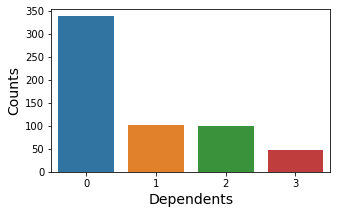

In [53]:
#visualize this column by Countplot
plt.figure(figsize =(5,3))
sns.countplot(x = 'Dependents', data=df)
plt.xlabel('Dependents', fontsize = 14)
plt.ylabel('Counts', fontsize = 14)

In [54]:
df.groupby('Dependents')['Loan_Status'].value_counts(normalize = True)
#Checking the relationship between Dependents and Loan_Status

Dependents  Loan_Status
0           Y              0.692308
            N              0.307692
1           Y              0.643564
            N              0.356436
2           Y              0.767677
            N              0.232323
3           Y              0.625000
            N              0.375000
Name: Loan_Status, dtype: float64

In [55]:
df.groupby('Dependents')['Gender'].value_counts(normalize = True)
#Checking the relationship between Dependents and Gender

Dependents  Gender
0           Male      0.763314
            Female    0.236686
1           Male      0.811881
            Female    0.188119
2           Male      0.929293
            Female    0.070707
3           Male      0.937500
            Female    0.062500
Name: Gender, dtype: float64

In [56]:
df.groupby('Dependents')['Married'].value_counts(normalize = True)
#Checking the relationship between Dependents and Married

Dependents  Married
0           No         0.500000
            Yes        0.500000
1           Yes        0.772277
            No         0.227723
2           Yes        0.919192
            No         0.080808
3           Yes        0.875000
            No         0.125000
Name: Married, dtype: float64

Observation:
1. Null Values are found
2. Zero rating dependent is more than others
3. All Dependents loan status is yes more than no
4. All dependents ratings.  males are more than females
5. 2 rating dependent, married peoples are more

In [57]:
#check the updated shape of our dataset
print('Actual shape of our Dataset now :-------->', df.shape)

Actual shape of our Dataset now :--------> (586, 13)


# Column5: Education

In [58]:
df['Education'].unique()#check the unique values

array(['Graduate', 'Not Graduate'], dtype=object)

In [59]:
df['Education'].value_counts(normalize = True)#check the counts of unique values

Graduate        0.779863
Not Graduate    0.220137
Name: Education, dtype: float64

In [60]:
df['Education'].isnull().sum()#check the null values 

0

Text(0, 0.5, 'Counts')

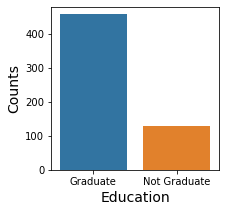

In [61]:
#visualize this column by Countplot
plt.figure(figsize =(3,3))
sns.countplot(x = 'Education', data=df)
plt.xlabel('Education', fontsize = 14)
plt.ylabel('Counts', fontsize = 14)

In [62]:
df.groupby('Education')['Loan_Status'].value_counts(normalize = True)
#Checking the relationship between Education and Loan_Status

Education     Loan_Status
Graduate      Y              0.708972
              N              0.291028
Not Graduate  Y              0.627907
              N              0.372093
Name: Loan_Status, dtype: float64

Observation:
1. No Null values are found
2. Graduate peoples are more than Ungraduate
3. Loan status is 'YES' more for graduate people than ungraduate 

In [63]:
#check the updated shape of our dataset
print('Actual shape of our Dataset now :-------->', df.shape)

Actual shape of our Dataset now :--------> (586, 13)


# Column6: Self-Employed 

In [64]:
df['Self_Employed'].unique()#check the unique values

array(['No', 'Yes', nan], dtype=object)

In [65]:
df['Self_Employed'].value_counts(normalize = True)#check the counts of unique values

No     0.862816
Yes    0.137184
Name: Self_Employed, dtype: float64

In [66]:
df['Self_Employed'].isnull().sum()#check the null values 

32

In [67]:
df.dropna(subset=["Self_Employed"], inplace=True) #drop the null values

In [68]:
df['Self_Employed'].isnull().sum()#check the null values 

0

In [69]:
df['Self_Employed'].unique()#check the unique values

array(['No', 'Yes'], dtype=object)

Text(0, 0.5, 'Counts')

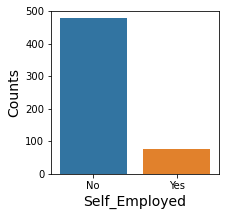

In [70]:
#visualize this column by lineplot
plt.figure(figsize =(3,3))
sns.countplot(x = 'Self_Employed', data=df)
plt.xlabel('Self_Employed', fontsize = 14)
plt.ylabel('Counts', fontsize = 14)

In [71]:
df.groupby('Self_Employed')['Loan_Status'].value_counts(normalize = True)
#Checking the relationship between Self_Employed and Loan_Status

Self_Employed  Loan_Status
No             Y              0.692469
               N              0.307531
Yes            Y              0.671053
               N              0.328947
Name: Loan_Status, dtype: float64

Observation:
1. Null values are found
2. Most of the peoples are not self- employed
3. Loan status 'YES' more for not self_employed 

In [72]:
#check the updated shape of our dataset
print('Actual shape of our Dataset now :-------->', df.shape)

Actual shape of our Dataset now :--------> (554, 13)


# Column7: ApplicantIncome

In [73]:
df['ApplicantIncome'].unique()#check the unique values

array([ 5849,  4583,  3000,  2583,  6000,  5417,  2333,  3036,  4006,
       12841,  3200,  3073,  1853,  1299,  4950,  3596,  3510,  4887,
        7660,  5955,  2600,  9560,  2799,  4226,  1442,  3167,  4692,
        3500, 12500,  2275,  1828,  3667,  4166,  3748,  3600,  1800,
        2400,  3941,  4695,  3410,  5649,  5821,  2645,  4000,  1928,
        3086,  4230,  4616, 11500,  2708,  2132,  3366,  8080,  3357,
        2500,  3029,  2609,  4945,  5726, 10750,  7100,  4300,  3208,
        1875,  4755,  5266,  3750,  1000,  3333,  3846,  2395,  1378,
        3988,  2366,  8566,  5695,  2958,  6250,  3273,  4133,  3620,
        2484,  1977,  4188,  1759,  4288,  4843,  4652,  3052, 11417,
        3800,  2071,  5316,  3572,  7451, 14583,  2214,  5568, 10408,
        2137,  2957,  3692,  3865, 10513,  6080, 20166,  2014,  2718,
        3459,  4895,  3316, 14999,  4200,  5042,  6950,  2698, 11757,
        2330, 14866,  1538, 10000,  4860,  6277,  2577,  9166,  2281,
        3254, 39999,

In [74]:
df['ApplicantIncome'].value_counts()#check the counts of unique values

2500    8
6000    6
4583    6
2600    5
3750    4
       ..
8566    1
4467    1
5488    1
2130    1
4095    1
Name: ApplicantIncome, Length: 463, dtype: int64

In [75]:
df['ApplicantIncome'].isnull().sum()#check the null values 

0

In [76]:
df['ApplicantIncome'].all() #check the zeros of the column

True

In [77]:
df.groupby('ApplicantIncome')['Loan_Status'].value_counts()
#Checking the relationship between ApplicantIncome and Loan_Status

ApplicantIncome  Loan_Status
150              N              1
645              Y              1
1000             N              1
1025             Y              2
1299             Y              1
                               ..
33846            N              1
37719            Y              1
39147            Y              1
39999            Y              1
81000            N              1
Name: Loan_Status, Length: 489, dtype: int64

Observation:
1. No zero values are found
2. No null values are found
3. it is very difficult to say based on applicant income, peoples loan was approved or not.

In [78]:
#check the updated shape of our dataset
print('Actual shape of our Dataset now :-------->', df.shape)

Actual shape of our Dataset now :--------> (554, 13)


# Column8: CoapplicantIncome

In [79]:
df['CoapplicantIncome'].unique()#check the unique values

array([0.00000000e+00, 1.50800000e+03, 2.35800000e+03, 4.19600000e+03,
       1.51600000e+03, 2.50400000e+03, 1.52600000e+03, 1.09680000e+04,
       7.00000000e+02, 8.10600000e+03, 2.84000000e+03, 1.08600000e+03,
       5.62500000e+03, 1.91100000e+03, 2.25300000e+03, 1.04000000e+03,
       1.66700000e+03, 3.00000000e+03, 2.06700000e+03, 1.33000000e+03,
       1.45900000e+03, 7.21000000e+03, 1.66800000e+03, 1.21300000e+03,
       2.33600000e+03, 3.44000000e+03, 2.27500000e+03, 1.64400000e+03,
       1.16700000e+03, 1.59100000e+03, 2.20000000e+03, 2.25000000e+03,
       2.85900000e+03, 3.79600000e+03, 3.44900000e+03, 4.59500000e+03,
       2.25400000e+03, 3.06600000e+03, 1.87500000e+03, 1.77400000e+03,
       4.75000000e+03, 3.02200000e+03, 4.00000000e+03, 2.16600000e+03,
       1.88100000e+03, 2.53100000e+03, 2.00000000e+03, 2.11800000e+03,
       4.16700000e+03, 2.90000000e+03, 5.65400000e+03, 1.82000000e+03,
       2.30200000e+03, 9.97000000e+02, 3.54100000e+03, 3.26300000e+03,
      

In [80]:
df['CoapplicantIncome'].value_counts()#check the counts of unique values

0.0       246
1666.0      5
2500.0      4
2250.0      3
1625.0      3
         ... 
2375.0      1
1842.0      1
1875.0      1
3500.0      1
2142.0      1
Name: CoapplicantIncome, Length: 270, dtype: int64

In [81]:
df['CoapplicantIncome'].all()#check the zeros of the column

False

In [82]:
df['CoapplicantIncome'] = df['CoapplicantIncome'].replace(0.0, df['CoapplicantIncome'].mean())

In [83]:
df['CoapplicantIncome'].all()#check the zeros of the column

True

In [84]:
df['CoapplicantIncome'].isnull().sum()#check the null values 

0

In [85]:
df['CoapplicantIncome'].skew() #check the skewness

8.058418391957112

In [86]:
# Calculate mean, median, mode and std to check the normalization curve
print('Mean of the column:----->',df['CoapplicantIncome'].mean())
print('Median of the column:----->',df['CoapplicantIncome'].median())
print('Mode of the column:----->',st.mode(df['CoapplicantIncome']))
print('std of the column:----->',df['CoapplicantIncome'].std())

Mean of the column:-----> 2289.6399535733217
Median of the column:-----> 1585.5756678495306
Mode of the column:-----> 1585.5756678495306
std of the column:-----> 2181.29666236735


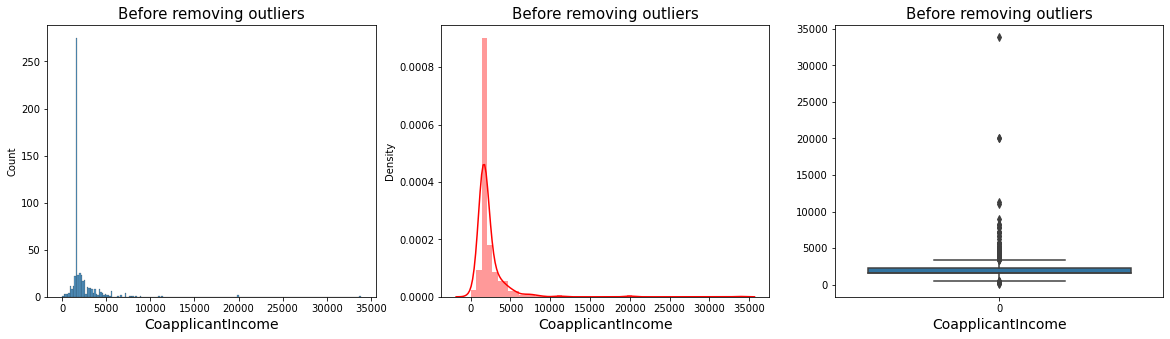

In [87]:
#Visualization
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(df['CoapplicantIncome']) #visualize the outliers by using histplot
plt.title('Before removing outliers', fontsize=15)
plt.xlabel('CoapplicantIncome', fontsize= 14)

plt.subplot(1,3,2)
sns.distplot(df['CoapplicantIncome'], color='r') #visualize the normalization curve by using distplot
plt.title('Before removing outliers', fontsize=15)
plt.xlabel('CoapplicantIncome', fontsize= 14)

plt.subplot(1,3,3)
sns.boxplot(data = df['CoapplicantIncome']) #visualize the outliers by using boxplot
plt.title('Before removing outliers', fontsize=15)
plt.xlabel('CoapplicantIncome', fontsize= 14)
plt.show()

In [88]:
df.drop(columns = ['CoapplicantIncome'], inplace = True) #drop the column

Observation:
1. Zero values are found
2. High skewness
3. Mean, median, mode values are not good
4. Huge amount fo outliers 
5. That's why we have to drop this column

In [89]:
#check the updated shape of our dataset
print('Actual shape of our Dataset now :-------->', df.shape)

Actual shape of our Dataset now :--------> (554, 12)


# Column9: LoanAmount

In [90]:
df['LoanAmount'].unique()#check the unique values

array([ nan, 128.,  66., 120., 141., 267.,  95., 158., 168., 349.,  70.,
       200., 114.,  17., 125., 100.,  76., 133., 104., 315., 116., 191.,
       122., 110.,  35.,  74., 106., 320., 144., 184.,  80.,  47.,  75.,
       134.,  96.,  88.,  44., 112., 286.,  97., 135., 180.,  99., 165.,
       258., 126., 312., 136., 172.,  81., 187., 113., 176., 130., 111.,
       167., 265.,  50., 210., 175., 131., 188.,  25., 137., 115., 151.,
       225., 216.,  94., 152., 185., 154.,  85., 259., 194.,  93., 160.,
       182., 650., 102., 290.,  84., 242., 129.,  30., 118., 244., 600.,
       255.,  98., 275., 121.,  63.,  87., 101., 495.,  67.,  73., 260.,
       108.,  58.,  48., 164., 170.,  83.,  90., 166., 124.,  55.,  59.,
       127., 214., 240.,  60., 280., 140., 155., 123., 201., 138., 279.,
       192., 304., 330., 150., 207., 436.,  78.,  54.,  89., 139., 132.,
       480.,  56., 300., 376., 117.,  71., 173.,  46., 228., 308., 105.,
       236., 570., 380., 296., 156., 109., 103.,  4

In [91]:
df['LoanAmount'].value_counts()#check the counts of unique values

120.0    17
100.0    15
110.0    14
187.0    12
130.0    10
         ..
250.0     1
62.0      1
85.0      1
214.0     1
436.0     1
Name: LoanAmount, Length: 194, dtype: int64

In [92]:
df['LoanAmount'].isnull().sum()#check the null values 

19

In [93]:
df.dropna(subset=["LoanAmount"], inplace=True) #drop the null values

In [94]:
df['LoanAmount'].isnull().sum()#check the null values 

0

In [95]:
df['LoanAmount'].skew() #check the skewness

2.5362165808605535

In [96]:
# Calculate mean, median, mode and std to check the normalization curve
print('Mean of the column:----->',df['LoanAmount'].mean())
print('Median of the column:----->',df['LoanAmount'].median())
print('Mode of the column:----->',st.mode(df['LoanAmount']))
print('std of the column:----->',df['LoanAmount'].std())

Mean of the column:-----> 144.9177570093458
Median of the column:-----> 127.0
Mode of the column:-----> 120.0
std of the column:-----> 82.50774996294794


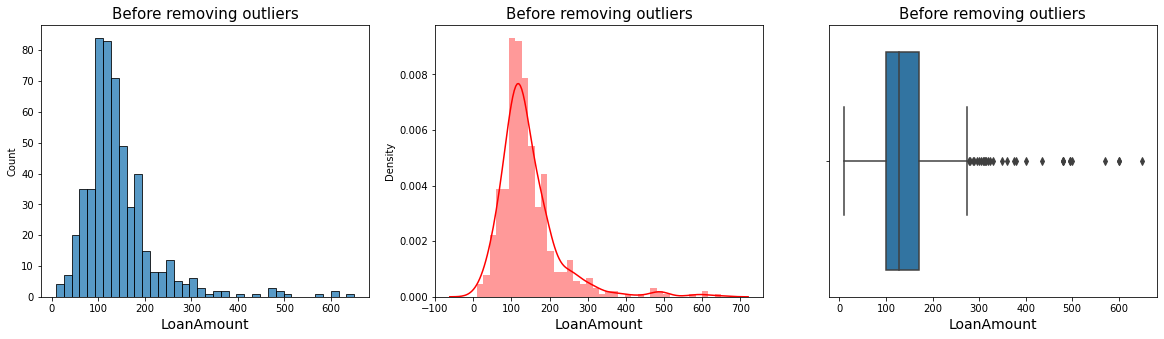

In [97]:
#visualization
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(df['LoanAmount']) #visualize the outliers by using histplot
plt.title('Before removing outliers', fontsize=15)
plt.xlabel('LoanAmount', fontsize= 14)

plt.subplot(1,3,2)
sns.distplot(df['LoanAmount'], color='r') #visualize the normalization curve by using distplot
plt.title('Before removing outliers', fontsize=15)
plt.xlabel('LoanAmount', fontsize= 14)

plt.subplot(1,3,3)
sns.boxplot(df['LoanAmount']) #visualize the outliers by using boxplot
plt.title('Before removing outliers', fontsize=15)
plt.xlabel('LoanAmount', fontsize= 14)
plt.show()

In [98]:
#Detecting the outlier by using iqr method and removing them.
q1 = np.percentile(df['LoanAmount'], 25,
                   interpolation = 'midpoint')
 
q3 = np.percentile(df['LoanAmount'], 75,
                   interpolation = 'midpoint')
iqr = q3 - q1
print('Inter quartile range:------>',iqr)
print("\n",'*'*50)

# higher side 
higher_side = df['LoanAmount'] >= (q3+1.5*iqr)
print('Higher range:-\n',np.where(higher_side))
print("\n",'*'*50)

# lower side 
lower_side = df['LoanAmount'] <= (q1-1.5*iqr)
print('Lower range:- \n',np.where(lower_side))

Inter quartile range:------> 70.0

 **************************************************
Higher range:-
 (array([  8,  18,  27,  46,  58, 109, 114, 134, 139, 153, 203, 222, 227,
       229, 246, 271, 285, 286, 304, 321, 324, 331, 339, 357, 424, 443,
       450, 458, 459, 469, 491, 501, 526], dtype=int64),)

 **************************************************
Lower range:- 
 (array([], dtype=int64),)


In [99]:
#First print the old shape and then compare
print("old Shape:------> ", df.shape)
#removing the outliers
high=np.where(higher_side)
low=np.where(lower_side)
df=df.drop(df.index[high])
df=df.drop(df.index[low])
 
print("New Shape:------> ", df.shape)

old Shape:------>  (535, 12)
New Shape:------>  (502, 12)


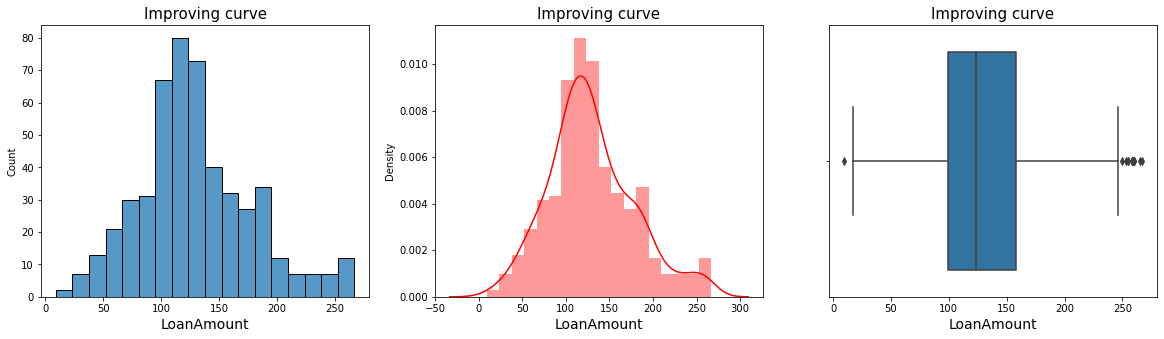

In [100]:
#visualization
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(df['LoanAmount']) #visualize the outliers by using histplot
plt.title('Improving curve', fontsize=15)
plt.xlabel('LoanAmount', fontsize= 14)

plt.subplot(1,3,2)
sns.distplot(df['LoanAmount'], color='r') #visualize the normalization curve by using distplot
plt.title('Improving curve', fontsize=15)
plt.xlabel('LoanAmount', fontsize= 14)

plt.subplot(1,3,3)
sns.boxplot(df['LoanAmount']) #visualize the outliers by using boxplot
plt.title('Improving curve', fontsize=15)
plt.xlabel('LoanAmount', fontsize= 14)
plt.show()

In [101]:
#Detecting the outlier by using iqr method and removing them.
q1 = np.percentile(df['LoanAmount'], 25,
                   interpolation = 'midpoint')
 
q3 = np.percentile(df['LoanAmount'], 75,
                   interpolation = 'midpoint')
iqr = q3 - q1
print('Inter quartile range:------>',iqr)
print("\n",'*'*50)

# higher side 
higher_side = df['LoanAmount'] >= (q3+1.5*iqr)
print('Higher range:-\n',np.where(higher_side))
print("\n",'*'*50)

# lower side 
lower_side = df['LoanAmount'] <= (q1-1.5*iqr)
print('Lower range:- \n',np.where(lower_side))

Inter quartile range:------> 59.0

 **************************************************
Higher range:-
 (array([  4,  52,  68,  96, 129, 149, 212, 283, 421, 457, 463, 487, 499],
      dtype=int64),)

 **************************************************
Lower range:- 
 (array([467], dtype=int64),)


In [102]:
#First print the old shape and then compare
print("old Shape:------> ", df.shape)
#removing the outliers
high=np.where(higher_side)
low=np.where(lower_side)
df=df.drop(df.index[high])
df=df.drop(df.index[low])
 
print("New Shape:------> ", df.shape)

old Shape:------>  (502, 12)
New Shape:------>  (488, 12)


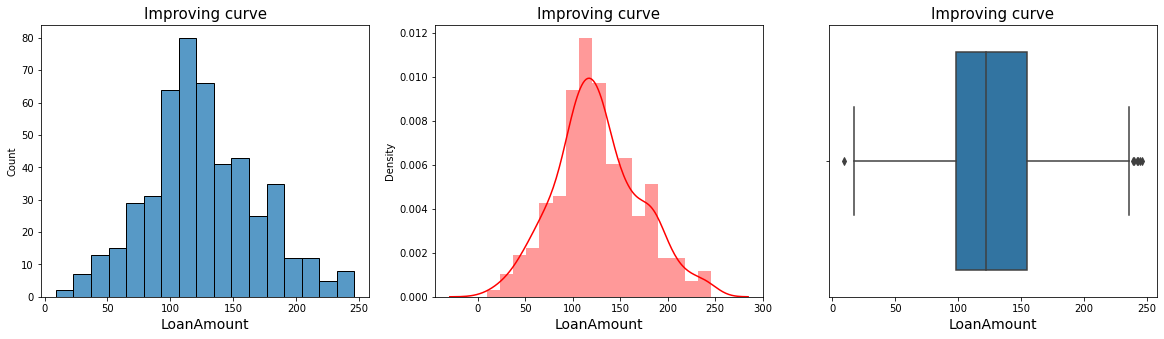

In [103]:
#visualization
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(df['LoanAmount']) #visualize the outliers by using histplot
plt.title('Improving curve', fontsize=15)
plt.xlabel('LoanAmount', fontsize= 14)

plt.subplot(1,3,2)
sns.distplot(df['LoanAmount'], color='r') #visualize the normalization curve by using distplot
plt.title('Improving curve', fontsize=15)
plt.xlabel('LoanAmount', fontsize= 14)

plt.subplot(1,3,3)
sns.boxplot(df['LoanAmount']) #visualize the outliers by using boxplot
plt.title('Improving curve', fontsize=15)
plt.xlabel('LoanAmount', fontsize= 14)
plt.show()

In [104]:
#Detecting the outlier by using iqr method and removing them.
q1 = np.percentile(df['LoanAmount'], 34,
                   interpolation = 'midpoint')
 
q3 = np.percentile(df['LoanAmount'], 75,
                   interpolation = 'midpoint')
iqr = q3 - q1
print('Inter quartile range:------>',iqr)
print("\n",'*'*50)

# higher side 
higher_side = df['LoanAmount'] >= (q3+1.5*iqr)
print('Higher range:-\n',np.where(higher_side))
print("\n",'*'*50)

# lower side 
lower_side = df['LoanAmount'] <= (q1-1.5*iqr)
print('Lower range:- \n',np.where(lower_side))

Inter quartile range:------> 46.5

 **************************************************
Higher range:-
 (array([ 84, 106, 116, 120, 170, 277, 286, 332, 383, 388, 389, 397, 409],
      dtype=int64),)

 **************************************************
Lower range:- 
 (array([ 10,  20,  76, 102, 115, 217, 446, 456, 466], dtype=int64),)


In [105]:
#First print the old shape and then compare
print("old Shape:------> ", df.shape)
#removing the outliers
high=np.where(higher_side)
low=np.where(lower_side)
df=df.drop(df.index[high])
df=df.drop(df.index[low])
 
print("New Shape:------> ", df.shape)

old Shape:------>  (488, 12)
New Shape:------>  (466, 12)


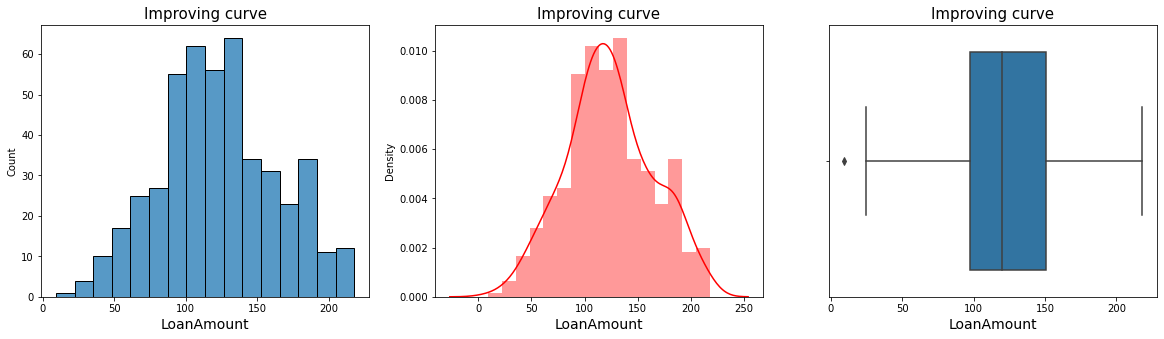

In [106]:
#visualization
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(df['LoanAmount']) #visualize the outliers by using histplot
plt.title('Improving curve', fontsize=15)
plt.xlabel('LoanAmount', fontsize= 14)

plt.subplot(1,3,2)
sns.distplot(df['LoanAmount'], color='r') #visualize the normalization curve by using distplot
plt.title('Improving curve', fontsize=15)
plt.xlabel('LoanAmount', fontsize= 14)

plt.subplot(1,3,3)
sns.boxplot(df['LoanAmount']) #visualize the outliers by using boxplot
plt.title('Improving curve', fontsize=15)
plt.xlabel('LoanAmount', fontsize= 14)
plt.show()

In [107]:
#Detecting the outlier by using iqr method and removing them.
q1 = np.percentile(df['LoanAmount'], 30,
                   interpolation = 'midpoint')
 
q3 = np.percentile(df['LoanAmount'], 75,
                   interpolation = 'midpoint')
iqr = q3 - q1
print('Inter quartile range:------>',iqr)
print("\n",'*'*50)

# higher side 
higher_side = df['LoanAmount'] >= (q3+1.5*iqr)
print('Higher range:-\n',np.where(higher_side))
print("\n",'*'*50)

# lower side 
lower_side = df['LoanAmount'] <= (q1-1.5*iqr)
print('Lower range:- \n',np.where(lower_side))

Inter quartile range:------> 49.5

 **************************************************
Higher range:-
 (array([], dtype=int64),)

 **************************************************
Lower range:- 
 (array([ 98, 427, 437], dtype=int64),)


In [108]:
#First print the old shape and then compare
print("old Shape:------> ", df.shape)
#removing the outliers
high=np.where(higher_side)
low=np.where(lower_side)
df=df.drop(df.index[high])
df=df.drop(df.index[low])
 
print("New Shape:------> ", df.shape)

old Shape:------>  (466, 12)
New Shape:------>  (463, 12)


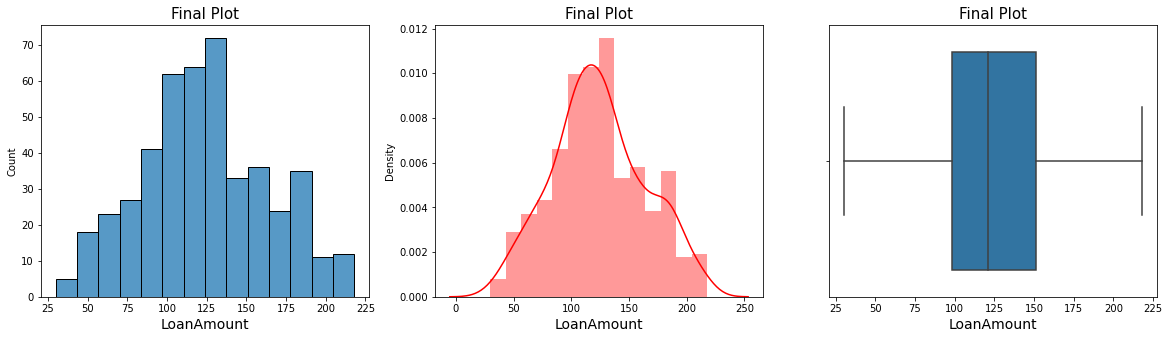

In [109]:
#visualization
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(df['LoanAmount']) #visualize the outliers by using histplot
plt.title('Final Plot', fontsize=15)
plt.xlabel('LoanAmount', fontsize= 14)

plt.subplot(1,3,2)
sns.distplot(df['LoanAmount'], color='r') #visualize the normalization curve by using distplot
plt.title('Final Plot', fontsize=15)
plt.xlabel('LoanAmount', fontsize= 14)

plt.subplot(1,3,3)
sns.boxplot(df['LoanAmount']) #visualize the outliers by using boxplot
plt.title('Final Plot', fontsize=15)
plt.xlabel('LoanAmount', fontsize= 14)
plt.show()

In [110]:
df['LoanAmount'].skew() #now, check the skewness

0.1341777178658578

In [111]:
# Calculate mean, median, mode and std to check the normalization curve
print('Mean of the column:----->',df['LoanAmount'].mean())
print('Median of the column:----->',df['LoanAmount'].median())
print('Mode of the column:----->',st.mode(df['LoanAmount']))
print('std of the column:----->',df['LoanAmount'].std())

Mean of the column:-----> 124.04103671706264
Median of the column:-----> 121.0
Mode of the column:-----> 120.0
std of the column:-----> 40.073693487690896


In [112]:
df['LoanAmount'] = df['LoanAmount'].replace(120.0, df['LoanAmount'].mean())
#replace mode by mean value to improve curve

In [113]:
# Calculate mean, median, mode and std to check the normalization curve
print('Mean of the column:----->',df['LoanAmount'].mean())
print('Median of the column:----->',df['LoanAmount'].median())
print('Mode of the column:----->',st.mode(df['LoanAmount']))
print('std of the column:----->',df['LoanAmount'].std())

Mean of the column:-----> 124.18941171531331
Median of the column:-----> 124.04103671706264
Mode of the column:-----> 124.04103671706264
std of the column:-----> 40.065920185693486


In [114]:
df['LoanAmount'].skew() #now, check the skewness

0.12313568141279763

In [115]:
df.groupby('LoanAmount')['Loan_Status'].value_counts()
#Checking the relationship between LoanAmount and Loan_Status

LoanAmount  Loan_Status
30.0        Y              2
36.0        Y              1
40.0        Y              2
44.0        Y              2
45.0        N              1
                          ..
211.0       Y              1
214.0       N              1
216.0       N              1
            Y              1
218.0       N              1
Name: Loan_Status, Length: 209, dtype: int64

Text(3.674999999999997, 0.5, 'LoanAmount')

<Figure size 720x504 with 0 Axes>

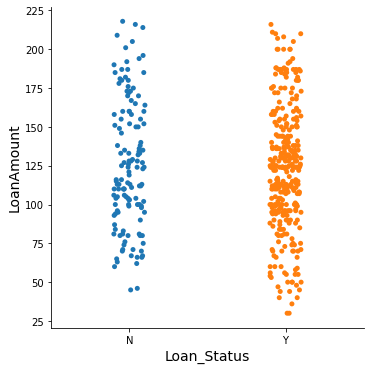

In [118]:
#visualize this column by catplot
plt.figure(figsize=(10,7))
sns.catplot(y= 'LoanAmount',x= 'Loan_Status', data=df)
plt.xlabel('Loan_Status', fontsize = 14)
plt.ylabel('LoanAmount', fontsize = 14)

Observation:
1. Null values are found and treated
2. Skewness is improved from 2.53 to 0.12
3. mean, median and mode values are improved
4. approval of loan is more than rejection 

In [1774]:
#check the updated shape of our dataset
print('Actual shape of our Dataset now :-------->', df.shape)

Actual shape of our Dataset now :--------> (463, 12)


# Column10: Loan_Amount_Term

In [1775]:
df['Loan_Amount_Term'].unique()#check the unique values

array([360., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

In [1776]:
df['Loan_Amount_Term'].value_counts()#check the counts of unique values

360.0    384
180.0     34
480.0     11
300.0     10
84.0       4
240.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [1777]:
df['Loan_Amount_Term'].all()#check the zeros of the column

True

In [1778]:
df['Loan_Amount_Term'].skew() #check the skewness

-2.4142446002715188

In [1779]:
# Calculate mean, median, mode and std to check the normalization curve
print('Mean of the column:----->',df['Loan_Amount_Term'].mean())
print('Median of the column:----->',df['Loan_Amount_Term'].median())
print('Mode of the column:----->',st.mode(df['Loan_Amount_Term']))
print('std of the column:----->',df['Loan_Amount_Term'].std())

Mean of the column:-----> 341.2416851441242
Median of the column:-----> 360.0
Mode of the column:-----> 360.0
std of the column:-----> 66.60438184316077


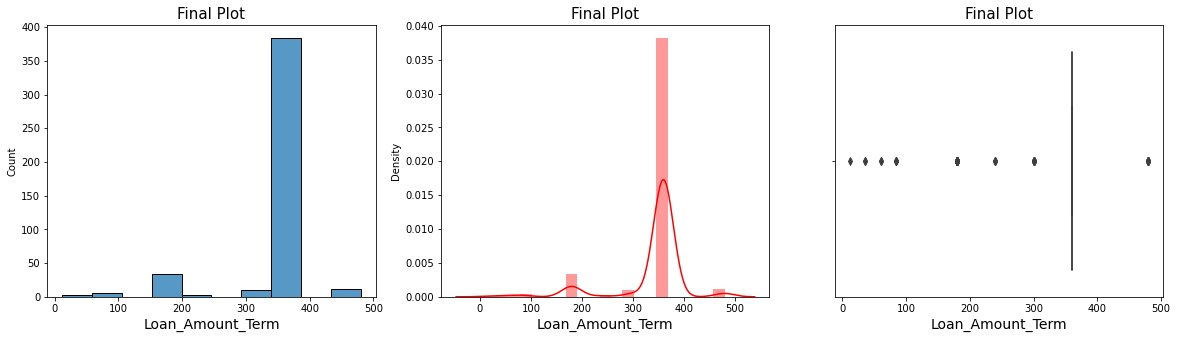

In [1780]:
#visualization
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(df['Loan_Amount_Term']) #visualize the outliers by using histplot
plt.title('Final Plot', fontsize=15)
plt.xlabel('Loan_Amount_Term', fontsize= 14)

plt.subplot(1,3,2)
sns.distplot(df['Loan_Amount_Term'], color='r') #visualize the normalization curve by using distplot
plt.title('Final Plot', fontsize=15)
plt.xlabel('Loan_Amount_Term', fontsize= 14)

plt.subplot(1,3,3)
sns.boxplot(df['Loan_Amount_Term']) #visualize the outliers by using boxplot
plt.title('Final Plot', fontsize=15)
plt.xlabel('Loan_Amount_Term', fontsize= 14)
plt.show()

In [1781]:
df.drop(columns = ['Loan_Amount_Term'], inplace = True) #drop the column

Observation:
1. Null values are found and zeros are not found
2. high skewness in negative
3. Mean, Median and mode values are not good
4. huge amount of outliers, that's why we drop this column. 

In [1782]:
#check the updated shape of our dataset
print('Actual shape of our Dataset now :-------->', df.shape)

Actual shape of our Dataset now :--------> (463, 11)


# Column11: Credit_History

In [1783]:
df['Credit_History'].unique()#check the unique values

array([ 1.,  0., nan])

In [1784]:
df['Credit_History'].value_counts()#check the counts of unique values

1.0    358
0.0     68
Name: Credit_History, dtype: int64

In [1785]:
df['Credit_History'].isnull().sum()#check the null values 

37

In [1786]:
df.dropna(subset=["Credit_History"], inplace=True) #drop the null values

In [1787]:
df['Credit_History'].isnull().sum()#check the null values 

0

In [1788]:
df.groupby('Credit_History')['Loan_Status'].value_counts(normalize = True)
#Checking the relationship between Credit_History and Loan_Status

Credit_History  Loan_Status
0.0             N              0.911765
                Y              0.088235
1.0             Y              0.812849
                N              0.187151
Name: Loan_Status, dtype: float64

Observation:
1. this column contains two values 1 or 0
2. Null values are found and treated
3. the percentage value of loan status is not approved for no credit history is high
4. and load approved for those who have credit history

In [1789]:
#check the updated shape of our dataset
print('Actual shape of our Dataset now :-------->', df.shape)

Actual shape of our Dataset now :--------> (426, 11)


# Column12: Property_Area

In [1790]:
df['Property_Area'].unique()#check the unique values

array(['Rural', 'Urban', 'Semiurban'], dtype=object)

In [1791]:
df['Property_Area'].value_counts()#check the counts of unique values

Semiurban    165
Urban        135
Rural        126
Name: Property_Area, dtype: int64

In [1792]:
df['Property_Area'].isnull().sum()#check the null values

0

In [1793]:
df.groupby('Property_Area')['Loan_Status'].value_counts(normalize = True)
#Checking the relationship between Property_Area and Loan_Status

Property_Area  Loan_Status
Rural          Y              0.634921
               N              0.365079
Semiurban      Y              0.781818
               N              0.218182
Urban          Y              0.651852
               N              0.348148
Name: Loan_Status, dtype: float64

In [1794]:
df['Property_Area'] = df['Property_Area'].map({'Rural':2,'Semiurban':1, 'Urban':0})
#convert string into integer

In [1795]:
df['Property_Area'].unique()#check the unique values

array([2, 0, 1], dtype=int64)

Observation:
1. No null values are found
2. column contains three value:- Urban, semiurban, rural
3. percentage value of loan approved for semiurbans are more than urban and rural.

In [1796]:
#check the updated shape of our dataset
print('Actual shape of our Dataset now :-------->', df.shape)

Actual shape of our Dataset now :--------> (426, 11)


# Label: Loan_Status

In [1797]:
df['Loan_Status'].unique()#check the unique values

array(['N', 'Y'], dtype=object)

In [1798]:
df['Loan_Status'].value_counts()#check the counts of unique values

Y    297
N    129
Name: Loan_Status, dtype: int64

In [121]:
df['Loan_Status'].value_counts(normalize=True)#check the counts of unique values

Y    0.708423
N    0.291577
Name: Loan_Status, dtype: float64

Text(0, 0.5, 'count')

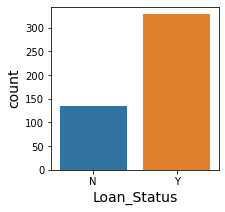

In [120]:
#visualize this column by catplot
plt.figure(figsize=(3,3))
sns.countplot(x= 'Loan_Status', data=df)
plt.xlabel('Loan_Status', fontsize = 14)
plt.ylabel('count', fontsize = 14)

In [1799]:
df['Loan_Status'].isnull().sum()#check the null values 

0

In [1800]:
df['Loan_Status'] = df['Loan_Status'].map({'Y':1, 'N':0})#convert string into integer

In [1801]:
df['Loan_Status'].unique()#check the unique values

array([0, 1], dtype=int64)

Observation:
1. no null values are found
2. approx 70% loan is approved rest rejected

In [1805]:
df['Gender'] = df['Gender'].map({'Male':1, 'Female':0}) 
df['Married'] = df['Married'].map({'Yes':1, 'No':0})
df['Education'] = df['Education'].map({'Graduate':1, 'Not Graduate':0})
df['Self_Employed'] = df['Self_Employed'].map({'Yes':1, 'No':0})
#convert string into integer

In [1806]:
#check the updated shape of our dataset
print('Actual shape of our Dataset now :-------->', df.shape)

Actual shape of our Dataset now :--------> (426, 11)


correlation between the Features and with label:-----> (10, 10)

 **************************************************


<function matplotlib.pyplot.show(close=None, block=None)>

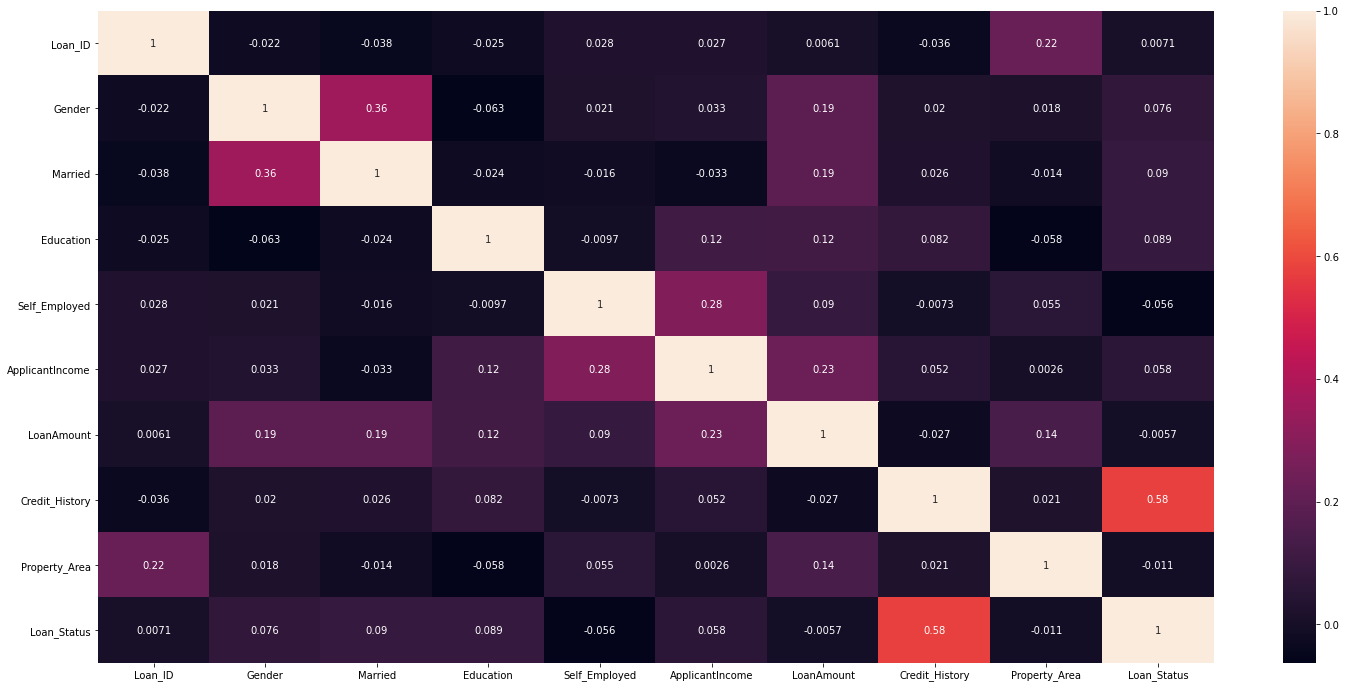

In [1807]:
# Check the correlation 
corr = df.corr()
print('correlation between the Features and with label:----->',corr.shape)
print("\n",'*'*50)
# Visualize the corrrelation by using heatmap
plt.figure(figsize=(25,12))
sns.heatmap(corr, annot=True)
plt.show 

In [1808]:
#split x and y
x = df.drop(['Loan_Status'], axis=1)
y=df.Loan_Status

In [1809]:
#scale the value x
Scaler = StandardScaler()
x_scaled = Scaler.fit_transform(x)
x_scaled

array([[-1.72689654,  0.48084704,  0.76396539, ...,  0.09418261,
         0.43582581,  1.30503589],
       [-1.7211639 ,  0.48084704,  0.76396539, ..., -1.45339426,
         0.43582581, -1.2510344 ],
       [-1.71543126,  0.48084704,  0.76396539, ..., -0.00463675,
         0.43582581, -1.2510344 ],
       ...,
       [ 1.76427979,  0.48084704,  0.76396539, ..., -2.10237811,
         0.43582581,  1.30503589],
       [ 1.77574507,  0.48084704,  0.76396539, ...,  1.56687672,
         0.43582581, -1.2510344 ],
       [ 1.78147771, -2.07966343, -1.30895981, ...,  0.21898719,
        -2.29449469,  0.02700074]])

In [1810]:
# Check the multicollinearity between the features
#import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["vif"]= [ variance_inflation_factor(x_scaled, i)
               for i in range ( x_scaled.shape[1])]
vif['features']= x.columns
vif 

,vif,features
0,1.066794,Loan_ID
1,1.185631,Gender
2,1.322585,Married
3,1.200055,Dependents
4,1.051978,Education
5,1.094414,Self_Employed
6,1.170293,ApplicantIncome
7,1.172515,LoanAmount
8,1.016748,Credit_History
9,1.089244,Property_Area


In [1813]:
#split data into train and test.
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y,test_size = 0.25, random_state=13)

In [1814]:
y_train.head()

480    1
384    0
89     1
270    1
116    1
Name: Loan_Status, dtype: int64

# Check the Accuracy by using 5 classification models

In [1815]:
log_reg = LogisticRegression() #Model instantiating
dt = DecisionTreeClassifier()
rf= RandomForestClassifier()
knn = KNeighborsClassifier()
svc = SVC()

In [1816]:
#train the model
log_reg.fit(x_train,y_train)
dt.fit(x_train,y_train)
rf.fit(x_train,y_train)
knn.fit(x_train,y_train)
svc.fit(x_train,y_train)
print("all models are trained")

all models are trained


In [1817]:
log_reg.score(x_test,y_test) #Let's check how well model fits the test data
dt.score(x_test,y_test)
rf.score(x_test,y_test)
knn.score(x_test,y_test)
svc.score(x_test,y_test)
print("all models score are captured")

all models score are captured


In [1818]:
y_pred_log_reg = log_reg.predict(x_test) #save the predictions in some variables
y_pred_dt = dt.predict(x_test) 
y_pred_rf = rf.predict(x_test) 
y_pred_knn = knn.predict(x_test) 
y_pred_svc = svc.predict(x_test) 

In [1823]:
#check the accuracy score, confusion matrix and classification report
print('Accuracy_score of Logistic regression:-------->  ',accuracy_score(y_test,y_pred_log_reg))
time.sleep(2)
print('Confusion_matrix:\n' , confusion_matrix(y_test,y_pred_log_reg))
time.sleep(2)
print('Classification_report:\n' , classification_report(y_test,y_pred_log_reg))

time.sleep(2)
print("\n",'*'*50)
print("\n",'*'*50)
time.sleep(2)


print('Accuracy_score of Decision Tree:-------->  ',accuracy_score(y_test,y_pred_dt))
time.sleep(2)
print('Confusion_matrix:\n' , confusion_matrix(y_test,y_pred_dt))
time.sleep(2)
print('Classification_report:\n' , classification_report(y_test,y_pred_dt))

time.sleep(2)
print("\n",'*'*50)
print("\n",'*'*50)
time.sleep(2)

print('Accuracy_score of Random forest:-------->  ',accuracy_score(y_test,y_pred_rf))
time.sleep(2)
print('Confusion_matrix:\n' , confusion_matrix(y_test,y_pred_rf))
time.sleep(2)
print('Classification_report:\n' , classification_report(y_test,y_pred_rf))

time.sleep(2)
print("\n",'*'*50)
print("\n",'*'*50)
time.sleep(2)

print('Accuracy_score of KNeighbors Classifiers:-------->  ',accuracy_score(y_test,y_pred_knn))
time.sleep(2)
print('Confusion_matrix:\n' , confusion_matrix(y_test,y_pred_knn))
time.sleep(2)
print('Classification_report:\n' , classification_report(y_test,y_pred_knn))

time.sleep(2)
print("\n",'*'*50)
print("\n",'*'*50)
time.sleep(2)

print('Accuracy_score of Support Vector Machine:-------->  ',accuracy_score(y_test,y_pred_svc))
time.sleep(2)
print('Confusion_matrix:\n' , confusion_matrix(y_test,y_pred_svc))
time.sleep(2)
print('Classification_report:\n' , classification_report(y_test,y_pred_svc))

Accuracy_score of Logistic regression:-------->   0.8317757009345794
Confusion_matrix:
 [[12 18]
 [ 0 77]]
Classification_report:
               precision    recall  f1-score   support

           0       1.00      0.40      0.57        30
           1       0.81      1.00      0.90        77

    accuracy                           0.83       107
   macro avg       0.91      0.70      0.73       107
weighted avg       0.86      0.83      0.80       107


 **************************************************

 **************************************************
Accuracy_score of Decision Tree:-------->   0.7289719626168224
Confusion_matrix:
 [[15 15]
 [14 63]]
Classification_report:
               precision    recall  f1-score   support

           0       0.52      0.50      0.51        30
           1       0.81      0.82      0.81        77

    accuracy                           0.73       107
   macro avg       0.66      0.66      0.66       107
weighted avg       0.73      0.73      

In [1835]:
#check all model cv score
print("Logistic regression CV Score:")
print(cross_val_score(log_reg,x_scaled,y,cv=5))

time.sleep(2)
print("\n",'*'*50)

print("Decision Tree CV Score:")
print(cross_val_score(dt,x_scaled,y,cv=5))

time.sleep(2)
print("\n",'*'*50)

print("Random Forest CV Score:")
print(cross_val_score(rf,x_scaled,y,cv=5))

time.sleep(2)
print("\n",'*'*50)

print("KNeighbour Classifier CV Score:")
print(cross_val_score(knn,x_scaled,y,cv=5))

time.sleep(2)
print("\n",'*'*50)

print("Support Vector Machine CV Score:")
print(cross_val_score(svc,x_scaled,y,cv=5))

Logistic regression CV Score:
[0.8372093  0.78823529 0.8        0.87058824 0.84705882]

 **************************************************
Decision Tree CV Score:
[0.86046512 0.72941176 0.76470588 0.76470588 0.71764706]

 **************************************************
Random Forest CV Score:
[0.55813953 0.77647059 0.8        0.84705882 0.83529412]

 **************************************************
KNeighbour Classifier CV Score:
[0.8255814  0.74117647 0.8        0.83529412 0.84705882]

 **************************************************
Support Vector Machine CV Score:
[0.8372093  0.78823529 0.8        0.87058824 0.84705882]


In [1836]:
#Check the mean of all models cv score one by one
print("Logistic regression CV Score:")
print(cross_val_score(log_reg,x_scaled,y,cv=5).mean())

time.sleep(2)
print("\n",'*'*50)

print("Decision Tree CV Score:")
print(cross_val_score(dt,x_scaled,y,cv=5).mean())

time.sleep(2)
print("\n",'*'*50)

print("Random Forest CV Score:")
print(cross_val_score(rf,x_scaled,y,cv=5).mean())

time.sleep(2)
print("\n",'*'*50)

print("KNeighbour Classifier CV Score:")
print(cross_val_score(knn,x_scaled,y,cv=5).mean())

time.sleep(2)
print("\n",'*'*50)

print("Support Vector Machine CV Score:")
print(cross_val_score(svc,x_scaled,y,cv=5).mean())

Logistic regression CV Score:
0.8286183310533517

 **************************************************
Decision Tree CV Score:
0.7720656634746922

 **************************************************
Random Forest CV Score:
0.7773187414500683

 **************************************************
KNeighbour Classifier CV Score:
0.8098221614227088

 **************************************************
Support Vector Machine CV Score:
0.8286183310533517


In [1]:
# Plot ROC/AUC for multiple models

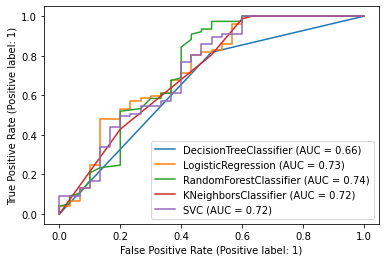

In [1837]:
#how well out model works on test data
disp = plot_roc_curve(dt,x_test,y_test)
plot_roc_curve(log_reg,x_test,y_test, ax= disp.ax_)
plot_roc_curve(rf,x_test,y_test, ax= disp.ax_)
plot_roc_curve(knn,x_test,y_test, ax= disp.ax_)
plot_roc_curve(svc,x_test,y_test, ax= disp.ax_)
plt.show()

# GridSearchCV By using Knn as a estimator

In [1868]:
param_grid = {'algorithm':['kdtree','brute'], 'leaf_size':[12,11,14,15,18,20,25], 'n_neighbors':[3,5,7,9,11,13]}
gridsearch = GridSearchCV(estimator=knn, param_grid= param_grid) #apply GridSearchCV
time.sleep(2)
print(gridsearch.fit(x_train,y_train)) #train the model
time.sleep(1)
print("\n",'*'*50)
time.sleep(1)
print('GridSearchCV best parameters:----->',gridsearch.best_params_) #get best parameters
time.sleep(1)
print("\n",'*'*50)
time.sleep(1)
#put best params into knn
knn1 = gridsearch.best_estimator_ #save that best param into one variable
print('Trained Model using best parameters:----->',knn1.fit(x_train,y_train))#train the model
time.sleep(1)
print("\n",'*'*50)
time.sleep(1)
print('Accuracy score:------>',knn1.score(x_train,y_train)) #check the accuracy score

GridSearchCV(estimator=KNeighborsClassifier(algorithm='brute', leaf_size=12,
                                            n_neighbors=11),
             param_grid={'algorithm': ['kdtree', 'brute'],
                         'leaf_size': [12, 11, 14, 15, 18, 20, 25],
                         'n_neighbors': [3, 5, 7, 9, 11, 13]})

 **************************************************
GridSearchCV best parameters:-----> {'algorithm': 'brute', 'leaf_size': 12, 'n_neighbors': 11}

 **************************************************
Trained Model:-----> KNeighborsClassifier(algorithm='brute', leaf_size=12, n_neighbors=11)

 **************************************************
Accuracy score:------> 0.8213166144200627


# GridSearchCV By using SVC as a estimator

In [1869]:
param_grid = {'C': [1,2,4,5,6,7,8,9,10],         
             'gamma': [0.2,0.3,0.4,0.5,0.6,0.7,0.8],
             'kernel': ['rbf']}
gridsearch = GridSearchCV(estimator=svc, param_grid= param_grid)#apply GridSearchCV
time.sleep(2)
print(gridsearch.fit(x_train,y_train)) #train the model
time.sleep(1)
print("\n",'*'*50)
time.sleep(1)
print('GridSearchCV best parameters:----->',gridsearch.best_params_) #get best parameters
time.sleep(1)
print("\n",'*'*50)
time.sleep(1)
#put best params into svc
svc1 = gridsearch.best_estimator_#save that best param into one variable
print('Trained Model using best parameters:----->',svc1.fit(x_train,y_train))#train the model
time.sleep(1)
print("\n",'*'*50)
time.sleep(1)
print('Accuracy score:------>',svc1.score(x_train,y_train))#check the accuracy score

GridSearchCV(estimator=SVC(C=1, gamma=0.2),
             param_grid={'C': [1, 2, 4, 5, 6, 7, 8, 9, 10],
                         'gamma': [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8],
                         'kernel': ['rbf']})

 **************************************************
GridSearchCV best parameters:-----> {'C': 1, 'gamma': 0.2, 'kernel': 'rbf'}

 **************************************************
Trained Model:-----> SVC(C=1, gamma=0.2)

 **************************************************
Accuracy score:------> 0.8683385579937304


# GridSearchCV By using RandomForestClassifier as a estimator

In [1870]:
params = {'n_estimators':[13,15],
         'criterion':['entropy'],
         'max_depth':[10,15],
         'min_samples_split':[10,11],
         'min_samples_leaf':[5,6]}
gridsearch = GridSearchCV(estimator=rf, param_grid= params)#apply GridSearchCV
time.sleep(2)
print(gridsearch.fit(x_train,y_train)) #train the model
time.sleep(1)
print("\n",'*'*50)
time.sleep(1)
print('GridSearchCV best parameters:----->',gridsearch.best_params_) #get best parameters
time.sleep(1)
print("\n",'*'*50)
time.sleep(1)
#put best params into knn
rfc = gridsearch.best_estimator_
print('Trained Model using best parameters:----->',rfc.fit(x_train,y_train)) #train the model
time.sleep(1)
print("\n",'*'*50)
time.sleep(1)
print('Accuracy score:------>',rfc.score(x_train,y_train))#check the accuracy score

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['entropy'], 'max_depth': [10, 15],
                         'min_samples_leaf': [5, 6],
                         'min_samples_split': [10, 11],
                         'n_estimators': [13, 15]})

 **************************************************
GridSearchCV best parameters:-----> {'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 5, 'min_samples_split': 11, 'n_estimators': 15}

 **************************************************
Trained Model using best parameters:-----> RandomForestClassifier(criterion='entropy', max_depth=15, min_samples_leaf=5,
                       min_samples_split=11, n_estimators=15)

 **************************************************
Accuracy score:------> 0.8275862068965517


# GridSearchCV By using DecisionTreeClassifier as a estimator

In [1871]:
params = {'criterion':['entropy','gini'],
         'max_depth':range(10,15),
         'min_samples_split':[3,10],
         'min_samples_leaf':[2,10]}
gridsearch = GridSearchCV(estimator=dt, param_grid= params)#apply GridSearchCV
time.sleep(2)
print(gridsearch.fit(x_train,y_train)) #train the model
time.sleep(1)
print("\n",'*'*50)
time.sleep(1)
print('GridSearchCV best parameters:----->',gridsearch.best_params_) #get best parameters
time.sleep(1)
print("\n",'*'*50)
time.sleep(1)
#put best params into knn
dtr = gridsearch.best_estimator_
print('Trained Model using best parameters:----->',dtr.fit(x_train,y_train))#train the model
time.sleep(1)
print("\n",'*'*50)
time.sleep(1)
print('Accuracy score:------>',dtr.score(x_train,y_train))#check the accuracy score

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(10, 15),
                         'min_samples_leaf': [2, 10],
                         'min_samples_split': [3, 10]})

 **************************************************
GridSearchCV best parameters:-----> {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 10, 'min_samples_split': 3}

 **************************************************
Trained Model using best parameters:-----> DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=10,
                       min_samples_split=3)

 **************************************************
Accuracy score:------> 0.8432601880877743


# Bagging Classifier with Bootstrap = True (Using 4 models)

Using knn as a best estimator

In [1880]:
bag_knn = BaggingClassifier(KNeighborsClassifier(n_neighbors=5),
                           n_estimators=10, max_samples=0.5,
                           bootstrap=True, random_state=3,
                           oob_score=True)
time.sleep(2)
print('Model is Trained:- ', bag_knn.fit(x_train,y_train))
time.sleep(1)
print("\n",'*'*50)
time.sleep(1)
print('Accuracy score by using BaggingClassifier:-', bag_knn.score(x_test,y_test))

Model is Trained:-  BaggingClassifier(base_estimator=KNeighborsClassifier(), max_samples=0.5,
                  oob_score=True, random_state=3)

 **************************************************
Accuracy score by using BaggingClassifier:- 0.8317757009345794


Using svc as a best estimator

In [1884]:
bag_svc = BaggingClassifier(SVC(),                       #using svc as a best estimator
                           n_estimators=15,
                           bootstrap=True, random_state=5,
                           oob_score=True)
time.sleep(2)
print('Model is Trained:- ', bag_svc.fit(x_train,y_train))
time.sleep(1)
print("\n",'*'*50)
time.sleep(1)
print('Accuracy score by using BaggingClassifier:-', bag_svc.score(x_test,y_test))

Model is Trained:-  BaggingClassifier(base_estimator=SVC(), n_estimators=15, oob_score=True,
                  random_state=5)

 **************************************************
Accuracy score by using BaggingClassifier:- 0.8317757009345794


Using RandomForestClassifier as a best estimator

In [1894]:
bag_rf = BaggingClassifier(RandomForestClassifier(),#using RandomForest as a best estimator
                           n_estimators=15,
                           bootstrap=True, random_state=7,
                           oob_score=True)
time.sleep(2)
print('Model is Trained:- ', bag_rf.fit(x_train,y_train))
time.sleep(1)
print("\n",'*'*50)
time.sleep(1)
print('Accuracy score by using BaggingClassifier:-', bag_rf.score(x_test,y_test))

Model is Trained:-  BaggingClassifier(base_estimator=RandomForestClassifier(), n_estimators=15,
                  oob_score=True, random_state=7)

 **************************************************
Accuracy score by using BaggingClassifier:- 0.822429906542056


Using DecisionTreeClassifier as a best estimator

In [1895]:
bag_dt = BaggingClassifier(dt,                        #using DecisionTree as a best estimator
                           n_estimators=15,
                           bootstrap=True, random_state=7,
                           oob_score=True)
time.sleep(2)
print('Model is Trained:- ', bag_dt.fit(x_train,y_train))
time.sleep(1)
print("\n",'*'*50)
time.sleep(1)
print('Accuracy score by using BaggingClassifier:-', bag_dt.score(x_test,y_test))

Model is Trained:-  BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=15,
                  oob_score=True, random_state=7)

 **************************************************
Accuracy score by using BaggingClassifier:- 0.7850467289719626


# Bagging Classifier with Bootstrap = False (Using 4 models)

Using knn as a best estimator

In [1897]:
bag_knn = BaggingClassifier(KNeighborsClassifier(n_neighbors=5),#using knn as a best estimator
                           n_estimators=10, max_samples=0.5,
                           bootstrap=False, random_state=3,
                           )
time.sleep(2)
print('Model is Trained:- ', bag_knn.fit(x_train,y_train))
time.sleep(1)
print("\n",'*'*50)
time.sleep(1)
print('Accuracy score by using BaggingClassifier:-', bag_knn.score(x_test,y_test))

Model is Trained:-  BaggingClassifier(base_estimator=KNeighborsClassifier(), bootstrap=False,
                  max_samples=0.5, random_state=3)

 **************************************************
Accuracy score by using BaggingClassifier:- 0.822429906542056


Using svc as a best estimator

In [1898]:
bag_svc = BaggingClassifier(SVC(),                  #using svc as a best estimator
                           n_estimators=15,
                           bootstrap=False, random_state=5,
                           )
time.sleep(2)
print('Model is Trained:- ', bag_svc.fit(x_train,y_train))
time.sleep(1)
print("\n",'*'*50)
time.sleep(1)
print('Accuracy score by using BaggingClassifier:-', bag_svc.score(x_test,y_test))

Model is Trained:-  BaggingClassifier(base_estimator=SVC(), bootstrap=False, n_estimators=15,
                  random_state=5)

 **************************************************
Accuracy score by using BaggingClassifier:- 0.8317757009345794


Using RandomForestClassifier as a best estimator

In [1899]:
bag_rf = BaggingClassifier(RandomForestClassifier(),   #using RandomForest as a best estimator
                           n_estimators=15,
                           bootstrap=False, random_state=7,
                           )
time.sleep(2)
print('Model is Trained:- ', bag_rf.fit(x_train,y_train))
time.sleep(1)
print("\n",'*'*50)
time.sleep(1)
print('Accuracy score by using BaggingClassifier:-', bag_rf.score(x_test,y_test))

Model is Trained:-  BaggingClassifier(base_estimator=RandomForestClassifier(), bootstrap=False,
                  n_estimators=15, random_state=7)

 **************************************************
Accuracy score by using BaggingClassifier:- 0.822429906542056


Using DecisionTreeClassifier as a best estimator

In [1900]:
bag_dt = BaggingClassifier(dt,                       #using DecisionTree as a best estimator
                           n_estimators=15,
                           bootstrap=False, random_state=7,
                           )
time.sleep(2)
print('Model is Trained:- ', bag_dt.fit(x_train,y_train))
time.sleep(1)
print("\n",'*'*50)
time.sleep(1)
print('Accuracy score by using BaggingClassifier:-', bag_dt.score(x_test,y_test))

Model is Trained:-  BaggingClassifier(base_estimator=DecisionTreeClassifier(), bootstrap=False,
                  n_estimators=15, random_state=7)

 **************************************************
Accuracy score by using BaggingClassifier:- 0.7383177570093458


# Saving the Model

In [ ]:
#by using GridSearchCV and svc as an estimator, it is giving 86% accuracy, which is highest
#so, we select it as our best model

In [123]:
with open('Loan_application_status','wb') as f:
    pickle.dump(SVC(),f)